1. DATA ACQUISITION

In [1]:
import pandas as pd
df = pd.read_csv("Indian_earthquake_data.csv")

print(df.head())

print(df.info())
df.columns = ['Origin_Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location']


               Origin Time  Latitude  Longitude  Depth  Magnitude  \
0  2021-07-31 09:43:23 IST     29.06      77.42    5.0        2.5   
1  2021-07-30 23:04:57 IST     19.93      72.92    5.0        2.4   
2  2021-07-30 21:31:10 IST     31.50      74.37   33.0        3.4   
3  2021-07-30 13:56:31 IST     28.34      76.23    5.0        3.1   
4  2021-07-30 07:19:38 IST     27.09      89.97   10.0        2.1   

                               Location  
0          53km NNE of New Delhi, India  
1  91km W of Nashik, Maharashtra, India  
2   49km WSW of Amritsar, Punjab, India  
3           50km SW of Jhajjar, Haryana  
4            53km SE of Thimphu, Bhutan  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth       

In [2]:
#!pip3 install xgboost scikit-learn pandas numpy matplotlib seaborn


2.Data Preprocessing

In [3]:
df['Origin_Time'] = pd.to_datetime(df['Origin_Time'], format='%Y-%m-%d %H:%M:%S IST', errors='coerce')

df['Year'] = df['Origin_Time'].dt.year
df['Month'] = df['Origin_Time'].dt.month
df['Day'] = df['Origin_Time'].dt.day
df['Hour'] = df['Origin_Time'].dt.hour
df['Minute'] = df['Origin_Time'].dt.minute
df['Weekday'] = df['Origin_Time'].dt.weekday

print(df.isnull().sum())
#since data is already clean, no need of any cleaning process
#df = df.dropna()
print(df.head(5))

Origin_Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Location       0
Year           0
Month          0
Day            0
Hour           0
Minute         0
Weekday        0
dtype: int64
          Origin_Time  Latitude  Longitude  Depth  Magnitude  \
0 2021-07-31 09:43:23     29.06      77.42    5.0        2.5   
1 2021-07-30 23:04:57     19.93      72.92    5.0        2.4   
2 2021-07-30 21:31:10     31.50      74.37   33.0        3.4   
3 2021-07-30 13:56:31     28.34      76.23    5.0        3.1   
4 2021-07-30 07:19:38     27.09      89.97   10.0        2.1   

                               Location  Year  Month  Day  Hour  Minute  \
0          53km NNE of New Delhi, India  2021      7   31     9      43   
1  91km W of Nashik, Maharashtra, India  2021      7   30    23       4   
2   49km WSW of Amritsar, Punjab, India  2021      7   30    21      31   
3           50km SW of Jhajjar, Haryana  2021      7   30    13      56   
4            53km SE of

In [4]:
from geopy.distance import geodesic
#feature engineering

#defined a reference locn ndel
reference_point = (28.6139, 77.2090)

# calc dist for each earthquake location from ndel
df['Distance_km'] = df.apply(lambda row: geodesic(reference_point, (row['Latitude'], row['Longitude'])).km, axis=1)

df.head(5)

,Origin_Time,Latitude,Longitude,Depth,Magnitude,Location,Year,Month,Day,Hour,Minute,Weekday,Distance_km
0,2021-07-31 09:43:23,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India",2021,7,31,9,43,5,53.559239
1,2021-07-30 23:04:57,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India",2021,7,30,23,4,4,1055.569913
2,2021-07-30 21:31:10,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India",2021,7,30,21,31,4,421.035973
3,2021-07-30 13:56:31,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana",2021,7,30,13,56,4,100.559593
4,2021-07-30 07:19:38,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan",2021,7,30,7,19,4,1267.569467


In [5]:
from sklearn.preprocessing import StandardScaler

# normalization & scaling
df_scaled = df.copy()

# Normalization & scaling (only for logistic regression)
scaler = StandardScaler()
df_scaled[['Latitude', 'Longitude', 'Depth','Magnitude', 'Distance_km']] = scaler.fit_transform(
    df_scaled[['Latitude', 'Longitude', 'Depth','Magnitude','Distance_km']]
)

# Now use df_scaled for Logistic Regression
# Use df for Random Forest, SVM, MLP, etc.

print("Scaled DataFrame:")
print(df_scaled[['Latitude', 'Longitude', 'Depth','Magnitude', 'Distance_km']].head())

Scaled DataFrame:
   Latitude  Longitude     Depth  Magnitude  Distance_km
0 -0.119485  -0.343846 -0.709402  -1.656646    -1.985637
1 -1.359939  -0.787755 -0.709402  -1.786865    -0.275135
2  0.212027  -0.644718 -0.299008  -0.484671    -1.358328
3 -0.217308  -0.461235 -0.709402  -0.875329    -1.905404
4 -0.387140   0.894167 -0.636117  -2.177524     0.086763


3. EDA

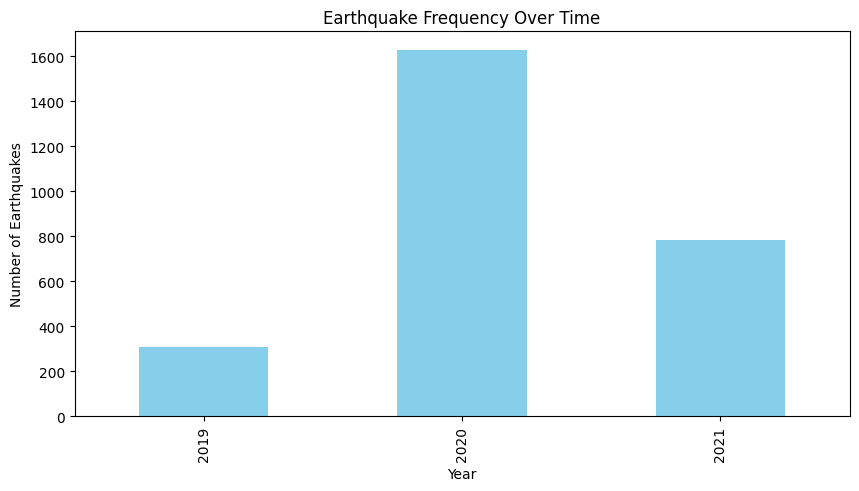

In [6]:
import matplotlib.pyplot as plt

df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Frequency Over Time')
plt.show()


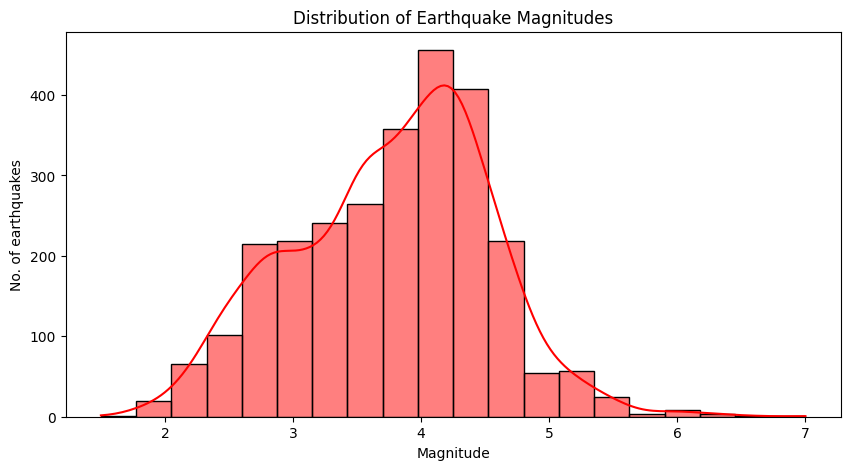

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Magnitude'], bins=20, kde=True, color='red')
plt.xlabel('Magnitude')
plt.ylabel('No. of earthquakes')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()


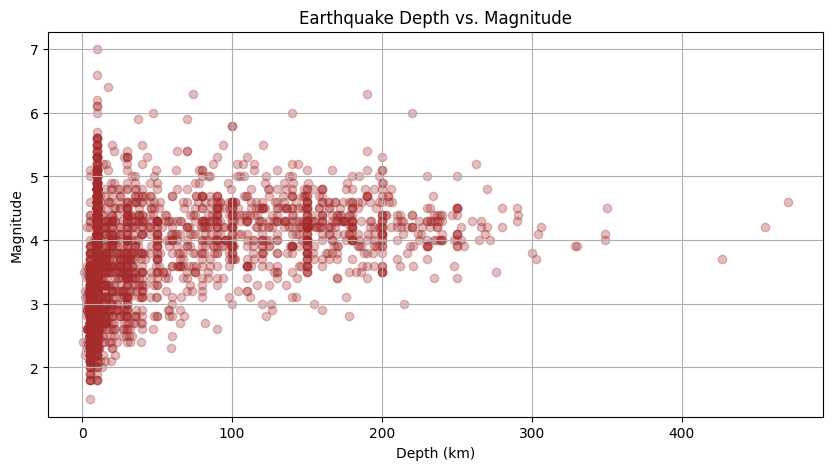

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Depth'], df['Magnitude'], alpha=0.3, color='brown')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Earthquake Depth vs. Magnitude')
plt.grid()
plt.show()

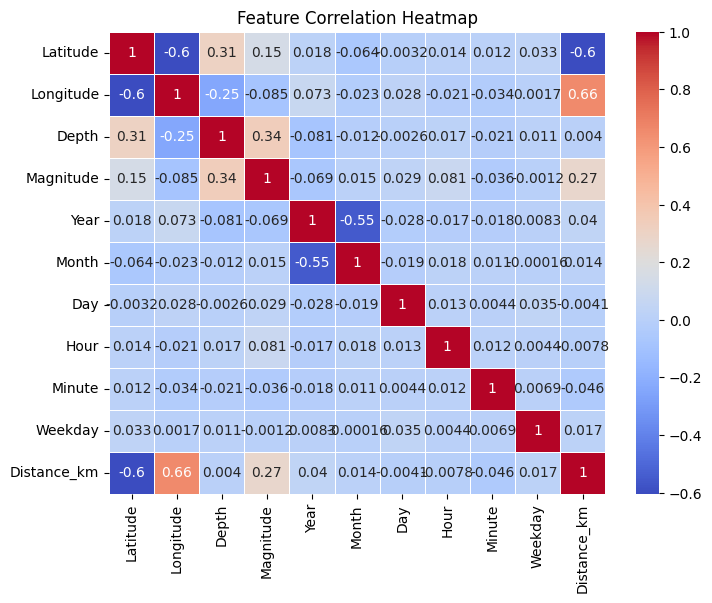

'\n-coolwarm mein red for positive correlation, blue for negative correlation\n-mainly for Feature Selection ie low correlation vaale features may not be useful for prediction\n-agar two features are highly correlated (close to +1 or -1), one of them may be redundant\n\nfor ex\nMagnitude and Depth have a strong positive correlation ie Deeper earthquakes might have higher magnitudes.\n\nLatitude and Magnitude have very low correlation (e.g., -0.02) ie Location might not significantly impact earthquake strength.\n\nYear and Magnitude show no correlation ie Earthquakes are unpredictable over time.\n'

In [9]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


'''
-coolwarm mein red for positive correlation, blue for negative correlation
-mainly for Feature Selection ie low correlation vaale features may not be useful for prediction
-agar two features are highly correlated (close to +1 or -1), one of them may be redundant

for ex
Magnitude and Depth have a strong positive correlation ie Deeper earthquakes might have higher magnitudes.

Latitude and Magnitude have very low correlation (e.g., -0.02) ie Location might not significantly impact earthquake strength.

Year and Magnitude show no correlation ie Earthquakes are unpredictable over time.
'''

4. Data Splitting & Handling Imbalance

In [10]:
''' 
If we are predicting whether an earthquake is "Significant" (Magnitude ≥ 4.0) or "Minor" (Magnitude < 4.0), 
then we can create a binary target column.
'''

# Compute mean and standard deviation of the original Magnitude column
magnitude_mean =df['Magnitude'].mean()
magnitude_std=df['Magnitude'].std()

# Compute scaled threshold
scaled_threshold = (4.0 - magnitude_mean)/magnitude_std

print(f"Scaled threshold for Magnitude >= 4.0: {scaled_threshold}")


# Create binary target: 1 if magnitud>=4.0, else 0
df['Significant'] = (df['Magnitude'] >= 4).astype(int)
df_scaled['Significant'] =(df_scaled['Magnitude'] >= scaled_threshold).astype(int)


X = df[['Latitude', 'Longitude', 'Depth', 'Distance_km', 'Year', 'Month', 'Day', 'Hour']]
X_scaled = df_scaled[['Latitude', 'Longitude', 'Depth', 'Distance_km','Year', 'Month', 'Day', 'Hour']]  # For Logistic Regression
y = df['Significant']  # Target variable (same for both)

#data spilt into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


print("Sample of X_train_scaled (For Logistic Regression):")
print(X_train_scaled.head())

print("\nSample of X_train_original (For Other Models):")
print(X_train.head())



Scaled threshold for Magnitude >= 4.0: 0.2965909713428059
Sample of X_train_scaled (For Logistic Regression):
      Latitude  Longitude     Depth  Distance_km  Year  Month  Day  Hour
951   0.870976  -0.822281 -0.064497    -0.434850  2020     11   10    18
560   1.231020  -0.795647 -0.636117     0.006497  2021      3    6    13
627   0.153605  -0.280712 -0.709402    -1.591568  2021      2   18     3
1336 -0.037965   1.311442  2.075412     0.749793  2020      8   14    18
2512 -0.806965   1.291713  1.093399     0.911997  2019     11   28    21

Sample of X_train_original (For Other Models):
      Latitude  Longitude  Depth  Distance_km  Year  Month  Day  Hour
951      36.35      72.57   49.0   962.009002  2020     11   10    18
560      39.00      72.84   10.0  1220.549417  2021      3    6    13
627      31.07      78.06    5.0   284.404439  2021      2   18     3
1336     29.66      94.20  195.0  1655.971576  2020      8   14    18
2512     24.00      94.00  128.0  1750.990725  2019   

CLASSIFICATION MODELS:

5. Machine Learning Model Selection

### Logistic Regression Performance ###
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       297
           1       0.68      0.65      0.66       247

    accuracy                           0.70       544
   macro avg       0.70      0.69      0.69       544
weighted avg       0.70      0.70      0.70       544

ROC AUC Score: 0.7457367194209299


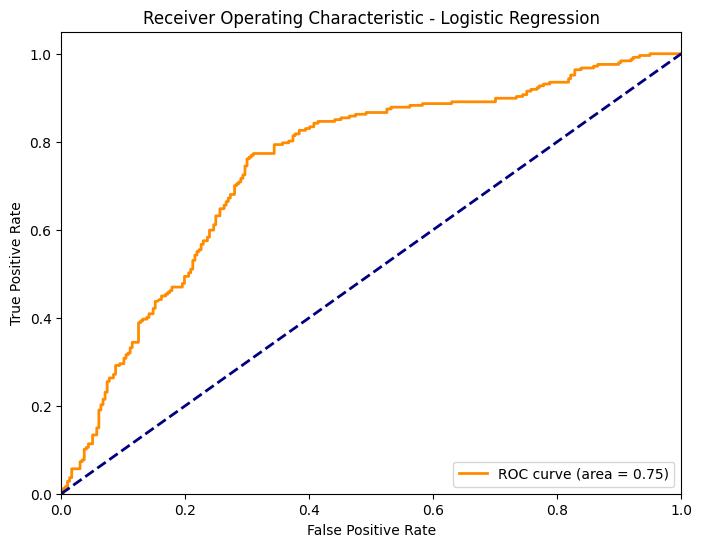

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

#X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaleds

#Initialize lr model; maxiter to ensure iter for convergence
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#train the model on the training data
log_reg.fit(X_train_scaled, y_train_scaled)

#predict on the test set
y_pred_log = log_reg.predict(X_test_scaled)

#evaluate the model
print("### Logistic Regression Performance ###")
print(classification_report(y_test_scaled, y_pred_log))
roc_auc_value = roc_auc_score(y_test_scaled, log_reg.predict_proba(X_test_scaled)[:, 1])
print("ROC AUC Score:", roc_auc_value)

# --- Plot the ROC Curve ---
#calc predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]#1 matlb positive class ki prob


fpr, tpr, thresholds = roc_curve(y_test_scaled, y_pred_proba)

#calc the auc
roc_auc_val = auc(fpr, tpr)

#Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### Random Forest Performance ###
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       297
           1       0.76      0.81      0.79       247

    accuracy                           0.80       544
   macro avg       0.80      0.80      0.80       544
weighted avg       0.80      0.80      0.80       544

ROC AUC Score: 0.8665398928556824


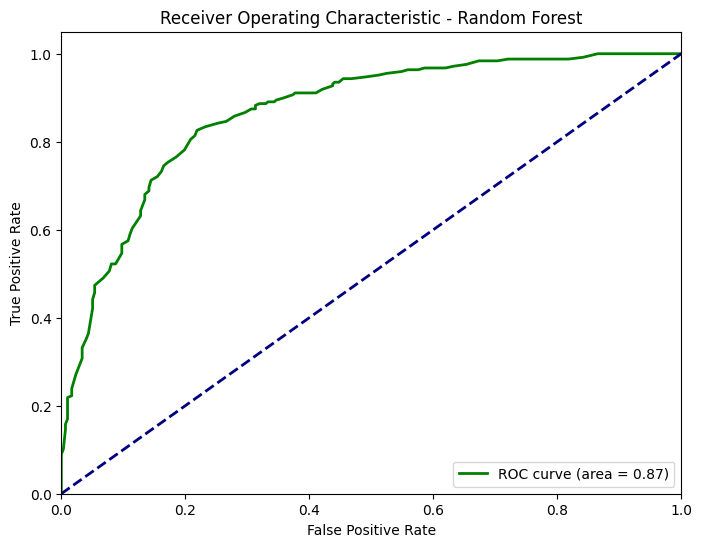

In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("### Random Forest Performance ###")
print(classification_report(y_test, y_pred_rf))
roc_auc_value = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_value)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


### SVM Performance ###
              precision    recall  f1-score   support

           0       0.65      0.90      0.75       297
           1       0.77      0.41      0.53       247

    accuracy                           0.67       544
   macro avg       0.71      0.65      0.64       544
weighted avg       0.70      0.67      0.65       544

ROC AUC Score: 0.7670974249921618


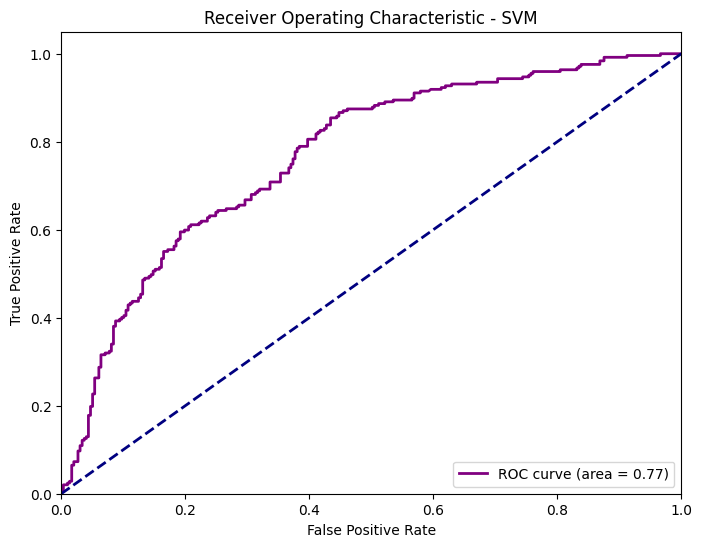

In [13]:

from sklearn.svm import SVC

#Initialize the SVM model with probability estimates enabled
svm_model = SVC(probability=True, random_state=42)

#Train the model on the training data
svm_model.fit(X_train, y_train)

#Predict on the test set
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
print("### SVM Performance ###")
print(classification_report(y_test, y_pred_svm))
roc_auc_value = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_value)

y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()


### MLP Performance ###
              precision    recall  f1-score   support

           0       0.88      0.52      0.65       297
           1       0.61      0.91      0.73       247

    accuracy                           0.70       544
   macro avg       0.75      0.72      0.69       544
weighted avg       0.76      0.70      0.69       544

ROC AUC Score: 0.8141809457598932


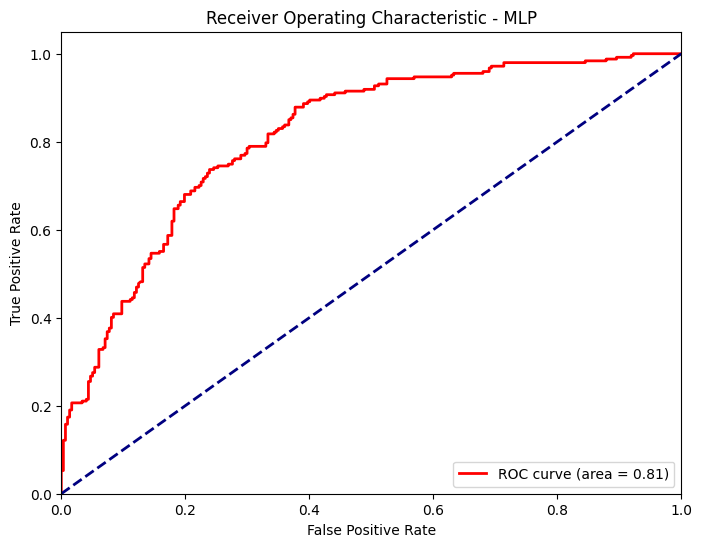

In [14]:

from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("### MLP Performance ###")
print(classification_report(y_test, y_pred_mlp))
roc_auc_value = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_value)

# --- Plot the ROC Curve ---
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc="lower right")
plt.show()


6.Model Comparison & Evaluation

In [15]:
#model perf tables
import pandas as pd

# Create a DataFrame to store model performance metrics
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "MLP (Neural Network)"],
    "ROC AUC Score": [roc_auc_score(y_test_scaled, log_reg.predict_proba(X_test_scaled)[:, 1]),
                      roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
                      roc_auc_score(y_test, svm_model.decision_function(X_test)),
                      roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])]
})

# Display the table
print(model_performance)


                  Model  ROC AUC Score
0   Logistic Regression       0.745737
1         Random Forest       0.866540
2                   SVM       0.767084
3  MLP (Neural Network)       0.814181


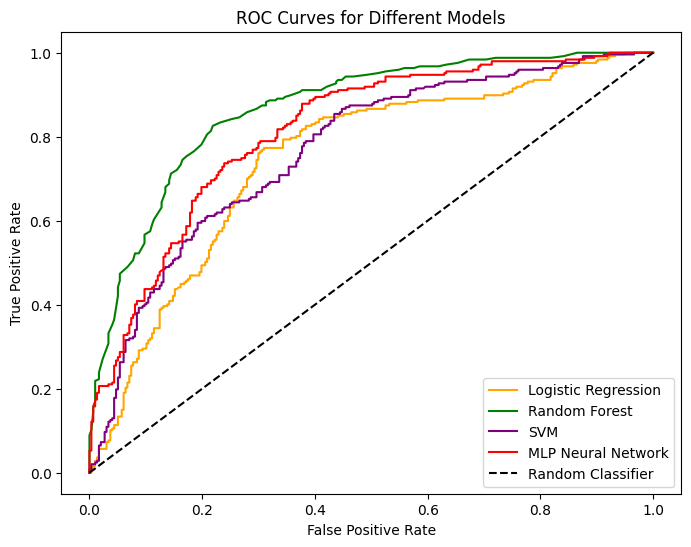

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
#X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled


#calc ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test_scaled, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test))
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:, 1])

#polt
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color="orange", label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, color="green", label="Random Forest")
plt.plot(fpr_svm, tpr_svm, color="purple", label="SVM")
plt.plot(fpr_mlp, tpr_mlp, color="red", label="MLP Neural Network")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()


7.Feature Importance Analysis

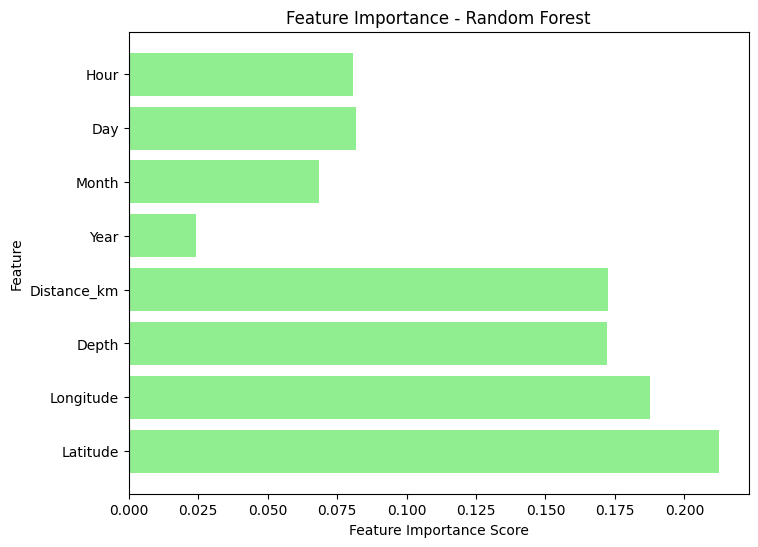

In [17]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color="lightgreen")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


8. Model Saving & Deployment

In [18]:
import joblib

# Save the best model - random forest
joblib.dump(rf_model, "best_earthquake_model.pkl")
print("The most apt model- \"Random Forest Classifier\" is saved successfully.")


The most apt model- "Random Forest Classifier" is saved successfully.


9.Predict on Existing Data and Identify High-Risk Locations

### Predicted New Earthquake Events ###
       Latitude  Longitude       Depth  Distance_km  Year  Month  Day  Hour  \
1013  38.966920  76.055804  154.585697  1162.650229  2025      3   24     8   
1981  20.008247  72.589332    6.566687  1049.310106  2025      1   26    19   
2198  39.381197  77.125246    5.656368  1230.033207  2025      6    1    22   
206   25.685925  98.827858    5.496652  2191.394679  2025      2    4    19   
1607  28.566435  77.060806    4.192090    62.654000  2025     11    6     5   

      Predicted_Significant  Probability  
1013                      1         0.69  
1981                      0         0.06  
2198                      0         0.50  
206                       1         0.54  
1607                      0         0.00  


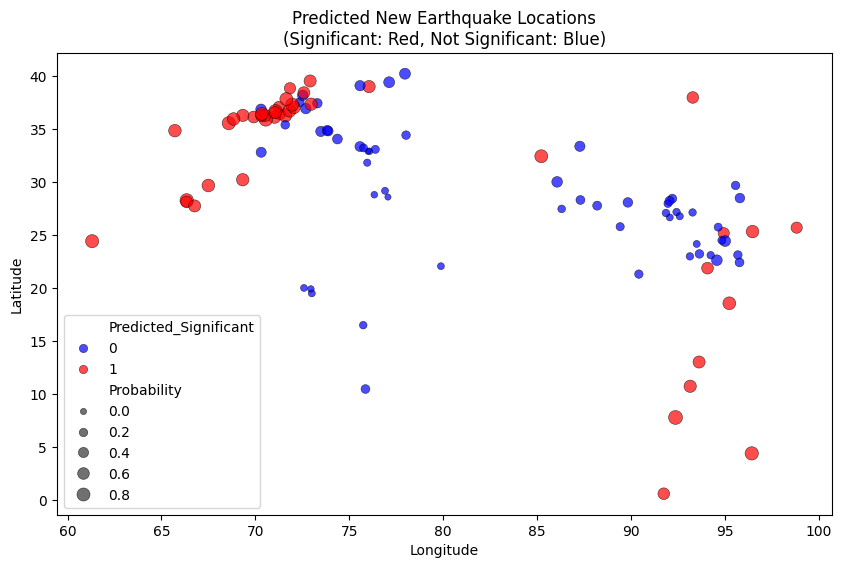

In [19]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = joblib.load("best_earthquake_model.pkl")

#Use past test data to generate new possible earthquake occurrences
num_new_points = 100  #Generate 100 new data points for prediction


#here it serves as a base to create new hypothetical scenarios for 2025
#generate new synthetic data by slightly modifying past test data
new_data = X_test.copy().sample(num_new_points, replace=True, random_state=42)

#Apply slight variations to simulate new earthquake occurrences
new_data['Latitude'] += np.random.uniform(-0.5, 0.5, num_new_points)
new_data['Longitude'] += np.random.uniform(-0.5, 0.5, num_new_points)
new_data['Depth'] += np.random.uniform(-5, 5, num_new_points)
new_data['Year'] = 2025  # Predicting earthquakes for the upcoming year
new_data['Month'] = np.random.randint(1, 13, num_new_points)# Random month
new_data['Day'] = np.random.randint(1, 29, num_new_points)# Random day
new_data['Hour'] = np.random.randint(0, 24, num_new_points)# Random hour

#Predict the likelihood of significant earthquakes
y_pred_new = rf_model.predict(new_data)
y_pred_proba_new = rf_model.predict_proba(new_data)[:, 1]  #Probability of significant earthquake

new_earthquake_predictions = new_data.copy()
new_earthquake_predictions['Predicted_Significant'] = y_pred_new
new_earthquake_predictions['Probability'] = y_pred_proba_new

print("### Predicted New Earthquake Events ###")
print(new_earthquake_predictions.head())

# Visualize locations of predicted significant earthquakes
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=new_earthquake_predictions, x="Longitude", y="Latitude", 
    hue="Predicted_Significant", size="Probability", 
    palette={0: "blue", 1: "red"},  # 0 = Blue (Not Significant), 1 = Red (Significant)
    sizes=(20, 100), edgecolor="k", alpha=0.7
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Predicted New Earthquake Locations\n(Significant: Red, Not Significant: Blue)")
plt.show()


In [20]:
!pip3 install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [21]:
import numpy as np
import pandas as pd
import joblib
import folium
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = joblib.load("best_earthquake_model.pkl")

new_data = X_test.copy()

#apply slight variations to simulate future earthquake occurrences
new_data['Latitude'] += np.random.uniform(-10.0, 10.0, len(new_data))  #Slight variation within 1deg
new_data['Longitude'] += np.random.uniform(-10.0, 10.0, len(new_data))
new_data['Depth'] += np.random.uniform(-5, 5, len(new_data))
new_data['Year'] = 2025  # Predicting earthquakes for the upcoming year
new_data['Month'] = np.random.randint(1, 13, len(new_data))
new_data['Day'] = np.random.randint(1, 29, len(new_data))
new_data['Hour'] = np.random.randint(0, 24, len(new_data))

#Predict the likelihood of significant earthquakes
y_pred_new = rf_model.predict(new_data)
y_pred_proba_new = rf_model.predict_proba(new_data)[:, 1]  # Probability of significant earthquake

#Store predictions in a DataFrame
new_earthquake_predictions = new_data.copy()
new_earthquake_predictions['Predicted_Significant'] = y_pred_new
new_earthquake_predictions['Probability'] = y_pred_proba_new

# Filter data for India (approximate latitude/longitude range)
india_lat_min, india_lat_max = 6, 38
india_lon_min, india_lon_max = 68, 98

new_earthquake_predictions = new_earthquake_predictions[
    (new_earthquake_predictions['Latitude'] >= india_lat_min) & 
    (new_earthquake_predictions['Latitude'] <= india_lat_max) & 
    (new_earthquake_predictions['Longitude'] >= india_lon_min) & 
    (new_earthquake_predictions['Longitude'] <= india_lon_max)
]

# Display the first few predictions
print("### Predicted Earthquake Events for 2025 (India) ###")
print(new_earthquake_predictions[['Latitude', 'Longitude', 'Depth', 'Probability']].head())

# Filter high-risk locations (Probability > 0.5)
high_risk_threshold = 0.5
high_risk_locations = new_earthquake_predictions[new_earthquake_predictions['Probability'] > high_risk_threshold]


earthquake_map = folium.Map(location=[20.59, 78.96], zoom_start=5)

#add markers
for _, row in high_risk_locations.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Probability'] * 10,  # Scale marker size by probability
        popup=f"Depth: {row['Depth']}km, Probability: {row['Probability']:.2f}",
        color='red' if row['Predicted_Significant'] == 1 else 'blue',
        fill=True,
        fill_color='red' if row['Predicted_Significant'] == 1 else 'blue',
        fill_opacity=0.6
    ).add_to(earthquake_map)

earthquake_map.save("high_risk_earthquakes.html")
print("Map of high-risk earthquake locations saved as 'high_risk_earthquakes.html'.")


### Predicted Earthquake Events for 2025 (India) ###
       Latitude  Longitude       Depth  Probability
1180  15.828151  76.044556    9.950541         0.35
2569  35.444908  68.816650  222.878213         0.89
2091  29.908138  70.994666  147.438175         0.92
2240  19.126072  90.542601   12.512774         0.67
1825  29.346934  89.637208    6.877300         0.22
Map of high-risk earthquake locations saved as 'high_risk_earthquakes.html'.


10.REGRESSION MODELS:

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("=== Linear Regression Results ===")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))



=== Linear Regression Results ===
MAE: 0.40206957334177273
MSE: 0.2071659890464084
R² Score: 0.16427603791712098


In [23]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("=== Random Forest Regressor Results ===")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))



=== Random Forest Regressor Results ===
MAE: 0.2975735294117647
MSE: 0.1541
R² Score: 0.37834842895895526


In [24]:
# Train Support Vector Regressor (using scaled features)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
print("=== Support Vector Regressor Results ===")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R² Score:", r2_score(y_test, y_pred_svr))



=== Support Vector Regressor Results ===
MAE: 0.43716322918887146
MSE: 0.3045724996636307
R² Score: -0.22866951921994882


In [25]:
# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
print("=== Gradient Boosting Regressor Results ===")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("R² Score:", r2_score(y_test, y_pred_gbr))



=== Gradient Boosting Regressor Results ===
MAE: 0.3090101531155378
MSE: 0.15023706470571585
R² Score: 0.39393181503631824


               Model       MAE       MSE  R² Score
0  Linear Regression  0.402070  0.207166  0.164276
1      Random Forest  0.297574  0.154100  0.378348
2                SVR  0.437163  0.304572 -0.228670
3  Gradient Boosting  0.309010  0.150237  0.393932


/var/folders/q3/5znpdfc13rl__schfks4vnmw0000gp/T/ipykernel_56717/3109840196.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="coolwarm")


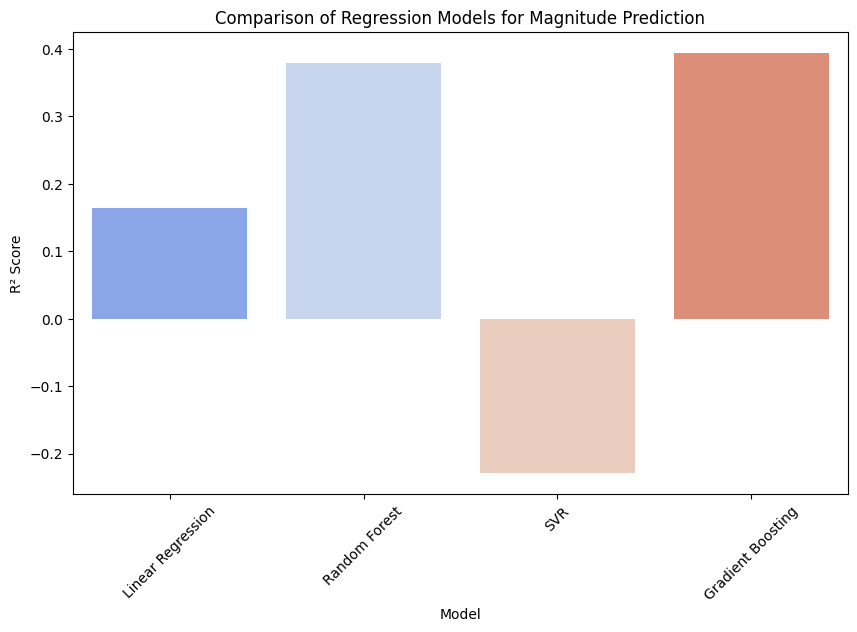

In [26]:
# Create a DataFrame to compare models
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR", "Gradient Boosting"],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_svr),
            mean_absolute_error(y_test, y_pred_gbr)],
    "MSE": [mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_svr),
            mean_squared_error(y_test, y_pred_gbr)],
    "R² Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_svr),
                 r2_score(y_test, y_pred_gbr)]
})

print(results_df)

# Visualizing Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="coolwarm")
plt.title("Comparison of Regression Models for Magnitude Prediction")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()


11. model saving

In [27]:
joblib.dump(gbr_model, "best_magnitude_model.pkl")

print("The most apt model- \"Gradient Boosting Regression\" is saved successfully.")

The most apt model- "Gradient Boosting Regression" is saved successfully.


In [34]:
import numpy as np
import pandas as pd
import joblib
import folium
from sklearn.preprocessing import StandardScaler

# Load the trained regression model
gbr_model = joblib.load("best_magnitude_model.pkl")

# Predict on X_test (copy to avoid modifying original)
X_mag_pred = X_test.copy()

# Drop Magnitude if present
if 'Magnitude' in X_mag_pred.columns:
    X_mag_pred = X_mag_pred.drop(columns=['Magnitude'])

np.random.seed(42)
X_mag_pred['Year'] = 2025
X_mag_pred['Month'] = np.random.randint(1, 13, len(X_mag_pred))
X_mag_pred['Day'] = np.random.randint(1, 29, len(X_mag_pred))
X_mag_pred['Hour'] = np.random.randint(0, 24, len(X_mag_pred))

# Predict on scaled data
X_mag_pred['Predicted_Magnitude'] = gbr_model.predict(X_mag_pred)

#Inverse Transform 
# Refit StandardScaler using actual training Magnitude values
original_magnitude_train = df.loc[y_train.index, 'Magnitude'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(original_magnitude_train)

#Inverse transform predictions
X_mag_pred['Predicted_Magnitude'] = scaler.inverse_transform(X_mag_pred[['Predicted_Magnitude']])

# Summary
print("\nPredicted Magnitude Summary:")
print(X_mag_pred['Predicted_Magnitude'].describe())

# === Filter for India only ===
india_lat_min, india_lat_max = 6, 38
india_lon_min, india_lon_max = 68, 98

X_mag_pred = X_mag_pred[
    (X_mag_pred['Latitude'] >= india_lat_min) &
    (X_mag_pred['Latitude'] <= india_lat_max) &
    (X_mag_pred['Longitude'] >= india_lon_min) &
    (X_mag_pred['Longitude'] <= india_lon_max)
]

# === High-magnitude filter ===
high_magnitude = X_mag_pred[X_mag_pred['Predicted_Magnitude'] > 3.7]

print("\n### High Predicted Magnitude Locations (Mag > 3.7) ###")
print(high_magnitude[['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude', 'Depth', 'Predicted_Magnitude']])

# === Create India-centric Folium map ===
if not high_magnitude.empty:
    center_lat = high_magnitude['Latitude'].mean()
    center_lon = high_magnitude['Longitude'].mean()
else:
    center_lat, center_lon = 22.0, 80.0

magnitude_map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

#Add markers
for _, row in high_magnitude.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=(row['Predicted_Magnitude'] - 3.7) * 4,  # scale with magnitude
        popup=f"Depth: {row['Depth']} km\nPredicted Magnitude: {row['Predicted_Magnitude']:.2f}",
        color='darkred' if row['Predicted_Magnitude'] > 3.7 else 'brown',
        fill=True,
        fill_color='darkred' if row['Predicted_Magnitude'] > 3.7 else 'brown',
        fill_opacity=0.7
    ).add_to(magnitude_map)

if not high_magnitude.empty:
    bounds = [
        [high_magnitude['Latitude'].min(), high_magnitude['Longitude'].min()],
        [high_magnitude['Latitude'].max(), high_magnitude['Longitude'].max()]
    ]
    magnitude_map.fit_bounds(bounds)

# Save the map
magnitude_map.save("predicted_magnitude_map_india.html")
print("Map saved as 'predicted_magnitude_map_india.html'")



Predicted Magnitude Summary:
count    544.000000
mean       4.114298
std        0.230785
min        3.700662
25%        3.898641
50%        4.137063
75%        4.321110
max        4.644286
Name: Predicted_Magnitude, dtype: float64

### High Predicted Magnitude Locations (Mag > 3.7) ###
      Year  Month  Day  Hour  Latitude  Longitude  Depth  Predicted_Magnitude
1180  2025      7    3     4     20.06      72.90    8.0             3.743442
2270  2025      4    1     3     22.10      94.00  203.0             4.059516
2569  2025     11    1    23     36.50      70.90  226.0             4.311189
2091  2025      8    8     5     34.30      69.60  150.0             4.463065
2240  2025      5   10     1     17.80      93.70   10.0             4.338689
...    ...    ...  ...   ...       ...        ...    ...                  ...
2249  2025      1    9     6     32.80      76.50    5.0             3.765674
1159  2025      3   23     2     30.81      85.72  137.0             4.412028
2070  2025